DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

amounts = np.concatenate([
    np.random.normal(500, 100, size=int(0.95 * n)),   # Normal spending
    np.random.normal(2000, 300, size=int(0.05 * n))   # Outlier spending
])

df = pd.DataFrame({
    'Transaction_ID': range(1, n + 1),
    'Amount': np.round(amounts, 2),
    'Customer_ID': np.random.randint(1000, 1100, size=n),
    'Merchant_Type': np.random.choice(['Grocery', 'Electronics', 'Luxury', 'Travel'], size=n)
})

df.to_csv("transactions.csv", index=False)


## Tasks:
1. How many outliers were found (Z-score vs. IQR)

2. What merchant type had the most outliers

3. Difference in average spend with/without outliers

4. Your thoughts on outlier handling in real finance



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  1000 non-null   int64  
 1   Amount          1000 non-null   float64
 2   Customer_ID     1000 non-null   int32  
 3   Merchant_Type   1000 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 27.5+ KB


In [3]:
df.head()

,Transaction_ID,Amount,Customer_ID,Merchant_Type
0,1,549.67,1043,Luxury
1,2,486.17,1048,Grocery
2,3,564.77,1074,Luxury
3,4,652.30,1060,Electronics
4,5,476.58,1066,Luxury


In [4]:
df['Merchant_Type'].value_counts()

Merchant_Type
Grocery        259
Travel         259
Luxury         245
Electronics    237
Name: count, dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


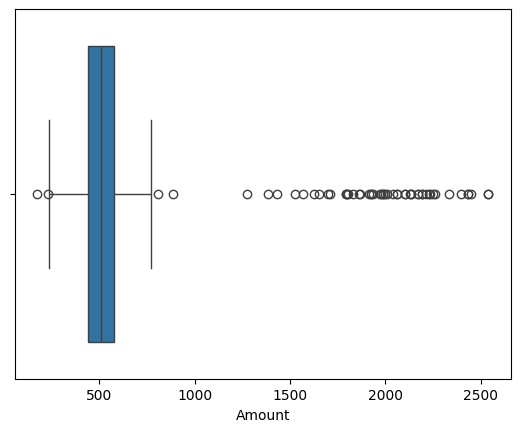

In [6]:
sns.boxplot(data=df, x='Amount')
plt.show()

In [7]:
from scipy.stats import zscore

df['Z'] = zscore(df['Amount'])
df['Outlier_Z'] = df['Z'].abs() > 3
df['Outlier_Z'].value_counts()


Outlier_Z
False    955
True      45
Name: count, dtype: int64

In [8]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

df['Outlier_IQR'] = (df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))
df['Outlier_IQR'].value_counts()

Outlier_IQR
False    946
True      54
Name: count, dtype: int64

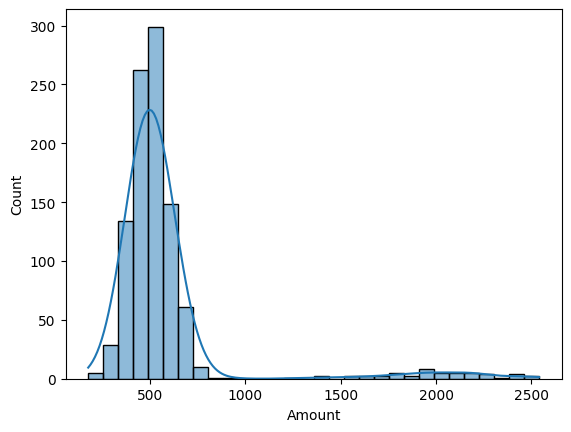

In [9]:
sns.histplot(df['Amount'], bins=30, kde=True)
plt.show()

In [10]:
df.head()

,Transaction_ID,Amount,Customer_ID,Merchant_Type,Z,Outlier_Z,Outlier_IQR
0,1,549.67,1043,Luxury,-0.078793,False,False
1,2,486.17,1048,Grocery,-0.261973,False,False
2,3,564.77,1074,Luxury,-0.035234,False,False
3,4,652.30,1060,Electronics,0.217267,False,False
4,5,476.58,1066,Luxury,-0.289638,False,False


In [11]:
merchant_outlier = df[df['Amount'] >= 1000].groupby('Merchant_Type')
merchant_outlier.head()

,Transaction_ID,Amount,Customer_ID,Merchant_Type,Z,Outlier_Z,Outlier_IQR
950,951,1927.63,1077,Electronics,3.896245,True,True
951,952,2105.62,1013,Travel,4.409697,True,True
952,953,1624.54,1033,Travel,3.021913,True,True
953,954,2433.13,1052,Luxury,5.354474,True,True
954,955,1975.35,1019,Luxury,4.033904,True,True
955,956,2335.19,1074,Luxury,5.071944,True,True
956,957,2102.82,1015,Grocery,4.401620,True,True
957,958,2137.03,1094,Travel,4.500307,True,True
958,959,2170.93,1069,Electronics,4.598099,True,True
959,960,2134.31,1055,Luxury,4.492460,True,True


In [12]:
for merchant, group in merchant_outlier:
    print(f"Merchant Type: {merchant}")
    print(group[['Transaction_ID', 'Amount']].count())
    print("\n")

Merchant Type: Electronics
Transaction_ID    14
Amount            14
dtype: int64


Merchant Type: Grocery
Transaction_ID    13
Amount            13
dtype: int64


Merchant Type: Luxury
Transaction_ID    13
Amount            13
dtype: int64


Merchant Type: Travel
Transaction_ID    10
Amount            10
dtype: int64




In [13]:
merchant_outliers_Z = merchant_outlier.filter(lambda x: x['Outlier_Z'].any())
print("Outliers by Merchant Type around Z score:", merchant_outliers_Z['Merchant_Type'].value_counts())

Outliers by Merchant Type around Z score: Merchant_Type
Electronics    14
Luxury         13
Grocery        13
Travel         10
Name: count, dtype: int64


In [14]:
merchant_outliers_IQR = merchant_outlier.filter(lambda x: x['Outlier_IQR'].any())
print("Outliers by Merchant Type around IQR:", merchant_outliers_IQR['Merchant_Type'].value_counts())


Outliers by Merchant Type around IQR: Merchant_Type
Electronics    14
Luxury         13
Grocery        13
Travel         10
Name: count, dtype: int64


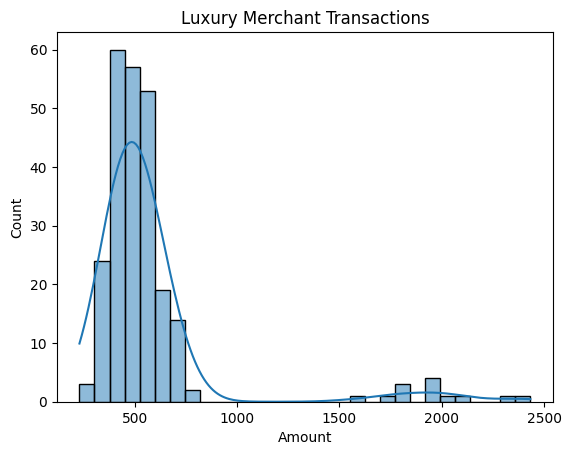

In [15]:
sns.histplot(df[df['Merchant_Type'] == 'Luxury']['Amount'], bins=30, kde=True)
plt.title('Luxury Merchant Transactions')
plt.show()

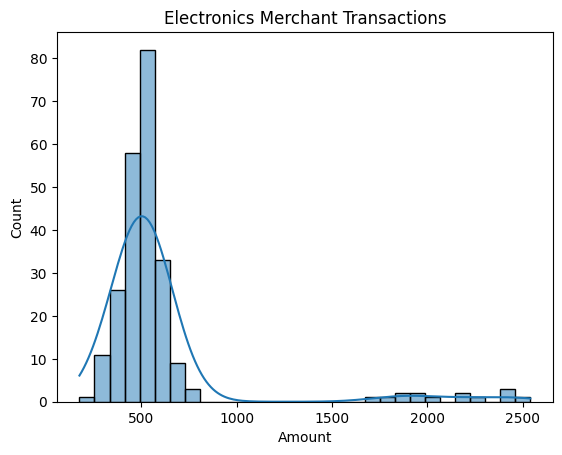

In [16]:
sns.histplot(df[df['Merchant_Type'] == 'Electronics']['Amount'], bins=30, kde=True)
plt.title('Electronics Merchant Transactions')
plt.show()


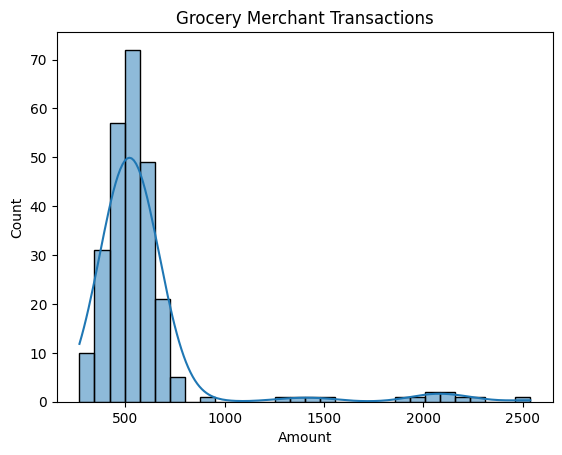

In [17]:
sns.histplot(df[df['Merchant_Type'] == 'Grocery']['Amount'], bins=30, kde=True)
plt.title('Grocery Merchant Transactions')
plt.show()


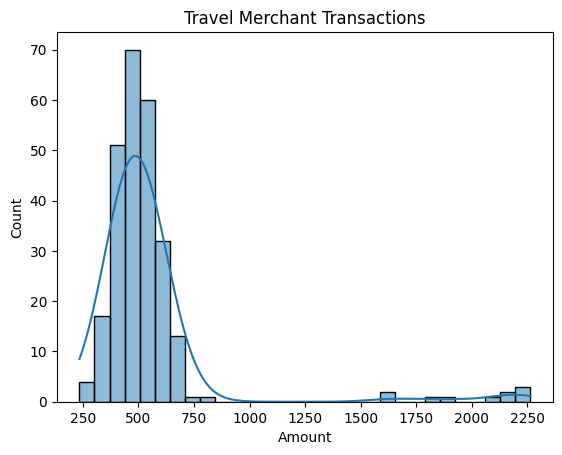

In [18]:
sns.histplot(df[df['Merchant_Type'] == 'Travel']['Amount'], bins=30, kde=True)
plt.title('Travel Merchant Transactions')
plt.show()

In [19]:
# With outliers
df['Amount'].describe()

count    1000.000000
mean      576.983820
std       346.826771
min       175.870000
25%       439.970000
50%       507.965000
75%       576.827500
max      2540.280000
Name: Amount, dtype: float64

In [20]:
# Without outliers
df['Amount_rmoutliers'] = df['Amount'].where(~df['Outlier_Z'], np.nan)
df['Amount_rmoutliers'].describe()

count     955.000000
mean      506.908073
std       119.030693
min       175.870000
25%       435.860000
50%       502.870000
75%       565.550000
max      1570.770000
Name: Amount_rmoutliers, dtype: float64

In [23]:
difference = df['Amount'].mean() - df['Amount_rmoutliers'].mean()
difference

np.float64(70.07574670157072)

### Answer

1. In Z-score and IQR score, the number of outliers are same i.e. 50.

2. Electronics Mechant_type have most of the outliers.  
But in luxury and grocery has also have too many outliers(just 1 less than electronics)
    - Also in luxury(Merchant_type) the number of customer are more who are spending in one specific range. Wheras in electronics and grocery the no. of customers are distributed along outliers.

3. Difference in average spend with/without outliers = 70.075

4. As most of the amount lies between 300 to 700, we have to offer more discounts and points over all the merchant_type. And for outliers we have to increase the supply of electronics to get more customers.
